In [2]:
! pip install scikit-commpy

In [3]:
import numpy as np
from scipy.linalg import hadamard
from scipy.stats import ortho_group
import commpy.modulation as modulation
import cmath

In [4]:
def Hermitian(matrix):
    [raws,columns]=matrix.shape
    conjec= np.zeros((raws,columns), dtype=complex)
    i=0
    while i<columns:
          conjec[:,i]=np.conj(matrix[:,i])
          i+=1
    reversed_conjec=conjec[-1::-1]
    z = np.zeros((1,L)) 
    modulated_uncodeda=np.vstack(z)
    modulated_uncodeda=np.vstack((modulated_uncodeda,matrix))
    modulated_uncodedb=np.vstack((modulated_uncodeda,z))
    Hermitian_Data=np.vstack((modulated_uncodedb,reversed_conjec))
    return Hermitian_Data

def PAPRformatrix(matrix):
    [raws,columns]=matrix.shape
    PAPR = np.zeros(columns)
    PAPRdB = np.zeros(columns)
    s=0
    while s<columns:
            max=np.max(matrix[:,s]*np.conj(matrix[:,s]))
            mean=np.sum(matrix[:,s]*np.transpose(np.conj(matrix[:,s])))/len(matrix[:,s])
            PAPR[s]=max/mean
            PAPRdB[s]=10*np.log10(PAPR[s])
            s+=1
    return [PAPR,PAPRdB]

def PAPRforcolumn(matrix):
    raws=matrix.shape
    PAPR = np.zeros(1)
    PAPRdB = np.zeros(1)
    max=np.max(matrix*np.conj(matrix))
    mean=np.sum(matrix*(np.conj(matrix)))/len(matrix)
    PAPR=max/mean
    PAPRdB=10*np.log10(PAPR) 
    return [PAPR,PAPRdB]

def IFFTformatrix(matrix):
    [raws,columns]=matrix.shape
    Data_ifft = np.zeros((raws,columns), dtype=complex)
    p=0
    while p<columns:
          Data_ifft[:,p]= np.fft.ifft(matrix[:,p])
          p+=1
    return Data_ifft

def matrixP2S(matrix):
    [raws,columns]=matrix.shape
    i = 0
    s = 0
    t = 0
    serial_data = np.zeros((raws*columns), dtype=complex)
    while i < columns:
          k=0
          while k < raws: 
                g=(matrix[k,i])
                serial_data[t]=g
                t+=1
                k+=1
          i+=1    
    return serial_data

def columnP2S(matrix):
    i = 0
    serial_data = np.zeros((len(matrix)), dtype=complex)
    for i in range(len(matrix)):
        serial_data[i]=matrix[i]
    return serial_data

def columnS2P(matrix):
    i = 0
    parallel_data = np.zeros((len(matrix),1), dtype=complex)
    for i in range(len(matrix)):
        parallel_data[i,0]=matrix[i]
    return parallel_data


def CP(matrix,length_of_CP):
    [raws,columns]=matrix.shape
    CP = matrix[raws-length_of_CP:raws,:]
    Data_CP = np.vstack((CP, matrix))
    return Data_CP

def CPpercolumn(matrix,length_of_CP):
    raws=matrix.shape
    CP = matrix[raws-length_of_CP:raws]
    Data_CP = np.vstack((CP, matrix))
    return Data_CP

def matrixneededshape(matrix,raws,columns):
    mat= np.zeros((raws,columns), dtype=complex)
    i=0
    t=0
    while i<columns:
          k=0
          while k<raws:
                g=matrix[t]
                mat[k,i]=g
                t+=1            
                k+=1
          i+=1
    return mat

def complex_ortho_matrix(raws,columns):
    h=np.array([1, -1, 1j, -1j])
    Ortho=np.zeros((raws,columns), dtype=complex)   #initialization
    l=0
    while l<N:
          Ortho[l]=np.random.choice(h,columns)
          l+=1
    return Ortho 

def decimalToBinary(n): 
    return bin(n).replace("0b","")
    
def comp2real(matrix):
 NN=matrix.shape[0]
 L=matrix.shape[1]
 NN_data=np.zeros((2*NN,L))
 for i in range(L):
   row=-1
   for j in range(NN):
     row=row+1
     NN_data[row,i]=matrix[j,i].real
     row=row+1
     NN_data[row,i]=matrix[j,i].imag
 return NN_data

In [5]:
           ###Start Tone Reservation###

#the selection of the tone location
NN=1024   #total number of subcarriers (TR+Data)
TR=32  #assum
N= NN - TR   #data subcarriers
L= 10000 #number of time slots
M = 4   #modulation order (QPSK)
K = int(np.log2(M))   #number of bit per modulation symbol
Target_PAPRdB= 6
kernel0=np.zeros((NN,1), dtype=int)   #initialization
separation_between_ones=int(NN/TR)   #separation_between_ones
positions_of_ones = np.zeros(TR)   #initialization
decimal_numbers_of_constellation = np.zeros(M)   #initialization
binary_numbers_of_constellation = np.zeros((M,K), dtype=complex)   #initialization
Data2=np.zeros((NN,L), dtype=complex)   #initialization
final_PAPRdB = np.zeros(L)   #initialization
Data4 = np.zeros((N), dtype=complex)   #initialization
modulated_uncoded2=np.zeros((N,L), dtype=complex)   #initialization
modulated_uncoded3=np.zeros((NN,L), dtype=complex)   #initialization


index = np.random.choice(modulated_uncoded3[:,1].shape[0], TR, replace=False) 
print('index',index)

#zero ones vector and ifft
i=0 
j=0 
while i<TR:
      kernel0[index[i],0]=1
      i=i+1
positions_of_ones=index
#print("kernel=",kernel0)
#print(positions_of_ones)

Peak_Reduction_Kernel=columnP2S((np.sqrt(NN)/TR)*IFFTformatrix(kernel0))
#print("Peak_Reduction_Kernel",Peak_Reduction_Kernel)

Data1 = np.random.randint(2,size=(K*N*L))
#print(Data1)
#print(Data1.shape)

#modulation from commpy library
modem = modulation.PSKModem(M)   # M-PSK modem initialization
modulated_uncoded1 = modem.modulate(Data1)
#print(modulated_uncoded1)
modulated_uncoded2=matrixneededshape(modulated_uncoded1,N,L)
#print(np.random.choice(modulated_uncoded2[:,0]))
#print(modulated_uncoded2)

#consist of total modulated data with tones
for i in range(L):
  y=0
  for j in range(NN):
    if j in positions_of_ones:
      #Data2[j,i]=np.random.choice(Data1)
      #Data2[j,i]=0
      Data2[j,i]=np.random.choice(modulated_uncoded2[:,i])
    else:
      Data2[j,i]=modulated_uncoded2[y,i]
      y+=1
#print("Data2",Data2)


index [ 200  401  446 1022  741  399  333  603  611   34  133  281  543  649
  987  924  267  441   89  273  624  625  253  410   58  706  101  119
  539  777  683  369]


In [6]:
   ###Gradient Algorithm###
iteration = 20
U=64  #number of phases
PAPRdBforeverytimeslot = np.zeros(U)   #initialization
data_final= np.zeros((N,U), dtype=complex)   #initialization
transmiting_signal1 = np.zeros((N,L), dtype=complex)   #initialization
phases= np.zeros((L), dtype=int)   #initialization 
PAPRdB2 = np.zeros(L)   #initialization 
t=0   #initialization
Hadamard=complex_ortho_matrix(N,U)
phase_for_each_symbol=np.zeros((N,L), dtype=complex)
#PPP=np.zeros((iteration,L), dtype=float)
j=0   #for every time slot
C=np.zeros((NN,L), dtype=complex)
while j<L:
      value=0
      k=0
      Data3=np.fft.ifft(Data2[:,j])
      Data4=columnP2S(Data3)
      #print("Data3",Data3)
      while k<iteration:
            #peak detection to find value and phase of max peak at data (x+c) in time domain every iteration
            position=np.argmax(np.abs(Data4))
            max_peak=Data4[position]
            p = cmath.phase(max_peak)   #phase of peak in radian

            #scaling and phase rotation
            scaling = max_peak/np.abs(max_peak)
            dif=np.abs(max_peak)-(np.sqrt(1.2*(np.sum(Data4*np.conj(Data4))/len(Data4))))
            alpha=scaling*dif
            #alpha=np.abs(max_peak)
            #alpha=1
            #print(alpha)

            #gradient algorithm formula
            value = (alpha*np.roll(Peak_Reduction_Kernel,position))  #Note: Peak_Reduction_Kernel  is circular shifted to the peak position

            #Adder
            Data4 = Data4 - value
            C[:,j]=C[:,j]+value
            #PAPR calculation
            Data5=columnS2P(Data4)   #we will calculate PAPR for this column(Data5) 
            [PAPR,PAPRdB]=PAPRformatrix(Data5)   #to calculate PAPR every iteration
            #PPP[k,j]=PAPRdB

            #controller
            if PAPRdB<=Target_PAPRdB:
               k=iteration   #to go out of iteration loop
               final_PAPRdB[j]=PAPRdB 
            else: k+=1
      i=0   #initialization
      while i<U:   #counter per columns of Hadamard
            [PAPR,PAPRdB] = PAPRforcolumn(Data5)   #PAPR calculation
            PAPRdBforeverytimeslot[i]=PAPRdB   #list PAPR values for diffrent phases
            i+=1 

      MinimumPAPR=np.min(PAPRdBforeverytimeslot)   #take the minimum PAPR value in PAPRdBforeverytimeslot array
      needed_Column=0   #initialization
      #loop to determined phase gives us the minimum PAPR
      while needed_Column<U:   
            if PAPRdBforeverytimeslot[needed_Column] == np.min(MinimumPAPR):
               FF=needed_Column   #phase gives us the minimum PAPR
            needed_Column+=1

      transmiting_signal1[:,t]= data_final[:,FF]   #Data after phases and IFFT 
      phases[t] = FF   #needed phases row
      PAPRdB2[t]=PAPRdBforeverytimeslot[FF]   #record the minimum PAPR values for every column in data
      phase_for_each_symbol[:,t] = Hadamard[:,FF]
      final_PAPRdB[j]=PAPRdB
      j+=1

transmiting_signal=np.vstack((transmiting_signal1,phases))   #adding phases raw to the TX data

              #####PAPR for Data without SLM reduction technique#####
data_final2 = IFFTformatrix(Data2)   #IFFT
[PAPR,PAPRdB]=PAPRformatrix(data_final2)   #PAPR

#print(PPP)
#print(final_PAPRdB)
#print(max_peak)


C:\Users\metwaly\AppData\Local\Temp\ipykernel_2088\2482436666.py:24: ComplexWarning: Casting complex values to real discards the imaginary part
  PAPR[s]=max/mean
C:\Users\metwaly\AppData\Local\Temp\ipykernel_2088\960687615.py:54: ComplexWarning: Casting complex values to real discards the imaginary part
  PAPRdBforeverytimeslot[i]=PAPRdB   #list PAPR values for diffrent phases
C:\Users\metwaly\AppData\Local\Temp\ipykernel_2088\960687615.py:69: ComplexWarning: Casting complex values to real discards the imaginary part
  final_PAPRdB[j]=PAPRdB


C:\Users\metwaly\AppData\Local\Temp\ipykernel_2088\2482436666.py:24: ComplexWarning: Casting complex values to real discards the imaginary part
  PAPR[s]=max/mean


Text(0.5, 1.0, 'TR PAPR simulation')

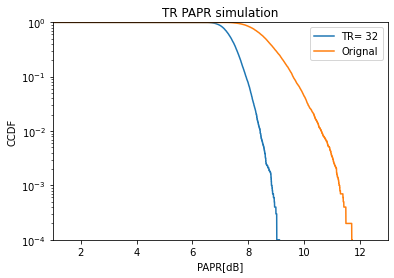

In [7]:
#CCDF drawing 
import matplotlib.pyplot as plt
count, bins_count = np.histogram(final_PAPRdB,bins=1000000,range=(0,15))
cdf = np.cumsum(count)/L
#plt.plot(bins_count[1:], cdf, label="CDF")   #draw CDF
plt.plot(bins_count[1:], (1-cdf), label='TR= '+str(TR))   #draw CCDF
plt.legend()

              #####PAPR for Data without SLM reduction technique#####
data_final2 = IFFTformatrix(modulated_uncoded2)   #IFFT
[PAPR,PAPRdB]=PAPRformatrix(data_final2)   #PAPR
#print(PAPRdB)

#CCDF drawing
import matplotlib.pyplot as plt
count, bins_count = np.histogram(PAPRdB,bins=1000000,range=(0,15))
cdf = np.cumsum(count)/L
#plt.plot(bins_count[:], cdf, label="CDF")
plt.plot(bins_count[1:], (1-cdf), label="Orignal")
plt.legend()
plt.yscale('log')
plt.ylim(10**-4,10**0)
plt.xlim(1,13)
plt.xlabel('PAPR[dB]')
plt.ylabel('CCDF')
plt.title('TR PAPR simulation')